In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps, trapz, cumtrapz
%matplotlib inline

In [78]:
sim_data = pd.read_csv('competitive_adsorption_dump.csv')
sim_data = sim_data.loc[ sim_data.Pf > 0 ]
sim_data.head()

,yc0,P0,ycf,Pf,rhoco,rhome
0,0.0,4.9,0.0,4.918986,0.0,0.000113
1,0.0,10.0,0.0,10.112816,0.0,0.000233
2,0.0,19.8,0.0,20.809083,0.0,0.000486
3,0.0,30.1,0.0,31.075349,0.0,0.000732
4,0.0,40.2,0.0,43.026626,0.0,0.001029


In [79]:
sim_data_high_v = pd.read_csv('competitive_adsorption_dump_higher_volume.csv')
sim_data_high_v = sim_data_high_v.loc[ sim_data_high_v.Pf > 0 ]
sim_data_high_v.head()

,yc0,P0,ycf,Pf,rhoco,rhome
0,0.0,4.9,0.0,4.936826,0.0,0.000113
1,0.0,10.0,0.0,10.112764,0.0,0.000233
2,0.0,19.8,0.0,20.590503,0.0,0.000480
3,0.0,30.1,0.0,31.749469,0.0,0.000747
4,0.0,40.2,0.0,42.842917,0.0,0.001029


In [80]:
co2_data = pd.read_csv('c02.txt', sep = '\t')
co2_data.head()

,Temperature (K),Pressure (bar),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/bar),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase
0,318.15,5.0,0.19293,5.18340,20.284,22.876,109.310,30.140,39.281,274.18,0.92860,15.928,0.018447,vapor
1,318.15,10.0,0.39422,2.53670,20.154,22.690,103.140,30.573,40.656,270.96,0.92945,15.980,0.018692,vapor
2,318.15,15.0,0.60480,1.65340,20.018,22.498,99.333,31.028,42.188,267.68,0.92996,16.047,0.018970,vapor
3,318.15,20.0,0.82579,1.21100,19.876,22.298,96.487,31.507,43.909,264.33,0.93004,16.131,0.019288,vapor
4,318.15,25.0,1.05850,0.94474,19.727,22.089,94.153,32.013,45.857,260.91,0.92959,16.234,0.019653,vapor


In [81]:
co2_data['P'] = co2_data['Pressure (bar)']
co2_data['T'] = co2_data['Temperature (K)']
co2_data['V'] = co2_data['Volume (l/mol)']
co2_data['Z'] = co2_data.V * co2_data.P/(.08314)/(318.15)

In [82]:
exp = ( co2_data.Z - 1 )/co2_data.P
integral = cumtrapz( exp, co2_data.P)
thiele = np.exp( integral )
thiele = np.insert(thiele, 0,1)
co2_data['F'] = thiele*co2_data.P

In [83]:
a = 3.658 #bar.L^2/mol^2
b = 0.04286 # L/mol
R = 0.08314 # L.bar/K.mol
T = 318.15 # K
co2_data['Zv'] = co2_data.V/(co2_data.V - b) - a/R/T/co2_data.V

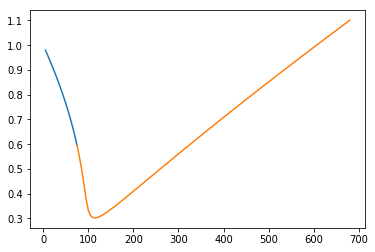

In [84]:
plt.plot( 'P', 'Z', data = co2_data.loc[ co2_data.Phase == 'vapor'], label = "vapor")
plt.plot( 'P', 'Z', data = co2_data.loc[ co2_data.Phase == 'supercritical'], label = "supercritical")

/data/miniconda3/envs/python_3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Second argument 'P' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """Entry point for launching an IPython kernel.


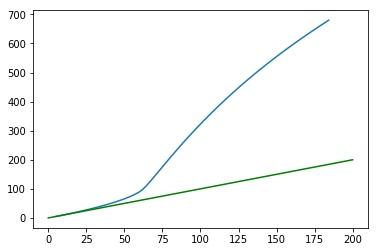

In [85]:
plt.plot( "F", "P", data = co2_data )
plt.plot( np.linspace(0,200,200), np.linspace( 0, 200, 200), color = "green", label = "y = x" )

In [86]:
me_data = pd.read_csv('ch4.txt', sep = '\t')
me_data.head()

,Temperature (K),Pressure (bar),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/bar),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase
0,318.15,5.0,0.19030,5.2549,12.639,15.266,96.023,28.254,36.900,460.93,0.37936,11.870,0.037379,vapor
1,318.15,10.0,0.38317,2.6098,12.586,15.196,90.096,28.320,37.309,459.86,0.37641,11.936,0.037693,vapor
2,318.15,15.0,0.57861,1.7283,12.533,15.126,86.559,28.386,37.730,458.88,0.37331,12.008,0.038018,vapor
3,318.15,20.0,0.77662,1.2876,12.480,15.055,84.001,28.452,38.163,458.00,0.37003,12.087,0.038356,vapor
4,318.15,25.0,0.97719,1.0233,12.426,14.984,81.978,28.518,38.607,457.21,0.36658,12.172,0.038708,vapor


In [87]:
me_data['P'] = me_data['Pressure (bar)']
me_data['T'] = me_data['Temperature (K)']
me_data['V'] = me_data['Volume (l/mol)']
me_data['Z'] = me_data.V * me_data.P/(.08314)/(318.15)

In [96]:
exp = ( me_data.Z - 1 )/me_data.P
integral = cumtrapz( exp, me_data.P)
thiele = np.exp( integral )
thiele = np.insert(thiele, 0,1)
me_data['F'] = thiele*me_data.P

/data/miniconda3/envs/python_3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Second argument 'P' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """Entry point for launching an IPython kernel.


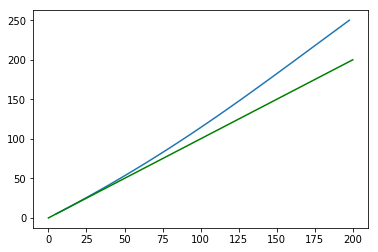

In [97]:
plt.plot( "F", "P", data = me_data )
plt.plot( np.linspace(0,200,200), np.linspace( 0, 200, 200), color = "green", label = "y = x" )

In [101]:
np.interp( 300, co2_data.P, co2_data.F )

95.83375175643904

In [105]:
def fugacity( P, yco, co2_data, me_data):
    f_co = np.interp( P, co2_data.P, co2_data.F)
    f_me = np.interp( P, me_data.P, me_data.F)
    f = f_co*yco + f_me*(1-yco)
    return f

In [107]:
fugacity( 100, 0.3, co2_data, me_data)

80.92566601098491

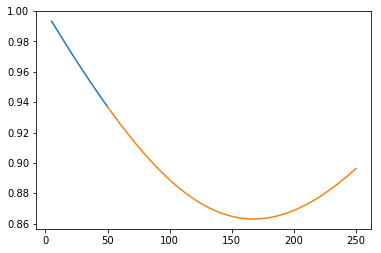

In [89]:
plt.plot( 'P', 'Z', data = me_data.loc[ me_data.Phase == 'vapor'], label = "vapor")
plt.plot( 'P', 'Z', data = me_data.loc[ me_data.Phase == 'supercritical'], label = "supercritical")

In [90]:
co2_sim_data = sim_data.loc[ sim_data.yc0 == 1 ,].copy()
co2_sim_data['Density (mol/l)'] = co2_sim_data.rhoco*(10**30)/(10**3)/(6.02*10**23)
co2_sim_data.head()

,yc0,P0,ycf,Pf,rhoco,rhome,Density (mol/l)
20,1.0,5.1,1.0,5.256844,0.000123,0.0,0.204266
21,1.0,10.1,1.0,10.465727,0.000250,0.0,0.414724
22,1.0,14.5,1.0,15.256774,0.000374,0.0,0.621128
23,1.0,20.1,1.0,22.484830,0.000566,0.0,0.940404
24,1.0,30.2,1.0,34.807022,0.000959,0.0,1.59302


In [91]:
co2_sim_data_high_v = sim_data_high_v.loc[sim_data_high_v.yc0 == 1, ].copy()
co2_sim_data_high_v['Density (mol/l)'] = co2_sim_data_high_v.rhoco*(10**30)/(10**3)/(6.02*10**23)
co2_sim_data_high_v.head()

,yc0,P0,ycf,Pf,rhoco,rhome,Density (mol/l)
20,1.0,5.1,1.0,5.219509,0.000122,0.0,0.202115
21,1.0,10.1,1.0,10.397857,0.000248,0.0,0.411567
22,1.0,14.5,1.0,15.625578,0.000381,0.0,0.632826
23,1.0,20.1,1.0,21.634617,0.000547,0.0,0.909092
24,1.0,30.2,1.0,35.089005,0.000957,0.0,1.58966


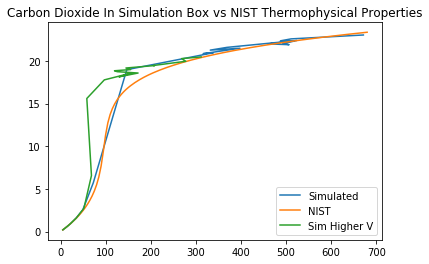

In [92]:
plt.plot(  "Pf", "Density (mol/l)", data = co2_sim_data, label =  "Simulated")
plt.plot( "Pressure (bar)", "Density (mol/l)", data = co2_data, label = "NIST" )
plt.plot(  "Pf", "Density (mol/l)", data = co2_sim_data_high_v, label =  "Sim Higher V")
plt.title( "Carbon Dioxide In Simulation Box vs NIST Thermophysical Properties")
plt.legend()

In [93]:
me_sim_data = sim_data.loc[ sim_data.yc0 == 0 ,].copy()
me_sim_data['Density (mol/l)'] = me_sim_data.rhome*(10**30)/(10**3)/(6.02*10**23)
me_sim_data.head()

,yc0,P0,ycf,Pf,rhoco,rhome,Density (mol/l)
0,0.0,4.9,0.0,4.918986,0.0,0.000113,0.187048
1,0.0,10.0,0.0,10.112816,0.0,0.000233,0.387754
2,0.0,19.8,0.0,20.809083,0.0,0.000486,0.806827
3,0.0,30.1,0.0,31.075349,0.0,0.000732,1.21645
4,0.0,40.2,0.0,43.026626,0.0,0.001029,1.70989


In [94]:
me_sim_data_high_v = sim_data_high_v.loc[ sim_data_high_v.yc0 == 0 ,].copy()
me_sim_data_high_v['Density (mol/l)'] = me_sim_data_high_v.rhome*(10**30)/(10**3)/(6.02*10**23)
me_sim_data_high_v.head()

,yc0,P0,ycf,Pf,rhoco,rhome,Density (mol/l)
0,0.0,4.9,0.0,4.936826,0.0,0.000113,0.187396
1,0.0,10.0,0.0,10.112764,0.0,0.000233,0.386454
2,0.0,19.8,0.0,20.590503,0.0,0.000480,0.797936
3,0.0,30.1,0.0,31.749469,0.0,0.000747,1.24141
4,0.0,40.2,0.0,42.842917,0.0,0.001029,1.70857


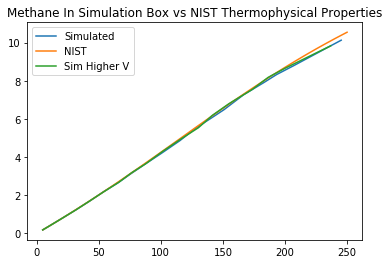

In [98]:
plt.plot(  "Pf", "Density (mol/l)", data = me_sim_data, label = "Simulated")
plt.plot( "Pressure (bar)", "Density (mol/l)", data = me_data, label = "NIST" )
plt.plot(  "Pf", "Density (mol/l)", data = me_sim_data_high_v, label = "Sim Higher V")
plt.title( "Methane In Simulation Box vs NIST Thermophysical Properties")
plt.legend()

/data/miniconda3/envs/python_3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'P' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


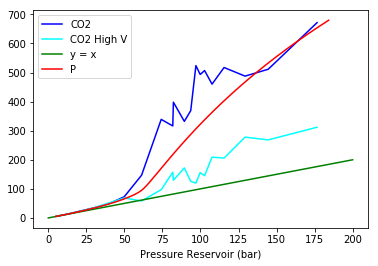

In [69]:
plt.plot( "P0", "Pf", data = co2_sim_data, color="blue", label = "CO2")
plt.plot( "P0", "Pf", data = co2_sim_data_high_v, color="cyan", label = "CO2 High V")
#plt.plot( "P0", "Pf", data = me_sim_data, color="red", label = "Methane")
#plt.plot( "P0", "Pf", data = me_sim_data_high_v, color="pink", label = "Methane High V")
plt.plot( np.linspace(0,200,200), np.linspace( 0, 200, 200), color = "green", label = "y = x" )
plt.plot( "F", "P", data = co2_data, color = "red" )
plt.xlabel("Pressure Reservoir (bar)")

plt.legend()

/data/miniconda3/envs/python_3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Second argument 'P' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


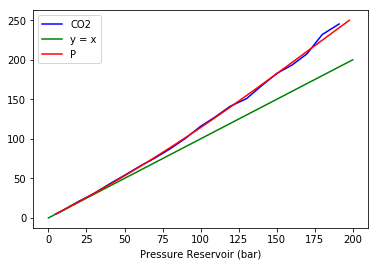

In [99]:
plt.plot( "P0", "Pf", data = me_sim_data, color="blue", label = "CO2")
#plt.plot( "P0", "Pf", data = me_sim_data, color="red", label = "Methane")
#plt.plot( "P0", "Pf", data = me_sim_data_high_v, color="pink", label = "Methane High V")
plt.plot( np.linspace(0,200,200), np.linspace( 0, 200, 200), color = "green", label = "y = x" )
plt.plot( "F", "P", data = me_data, color = "red" )
plt.xlabel("Pressure Reservoir (bar)")

plt.legend()

In [60]:
e_co = 257.8 #[J/K]
s_co = 3.71

e_me = 147.9 # eps over kb[K]
s_me = 3.73 # sigma [A]

r = np.linspace( 3.5, 10, 1000 ) 
r_co = s_co/r
r_me = s_me/r

U_co = 4*e_co*( r_co**12 - r_co**6) #[K]
F_co = 48*e_co*( r_co**12 - 0.5*r_co**6 )

U_me = 4*e_me*( r_me**12 - r_me**6) #[K]
F_me = 48*e_me*( r_me**12 - 0.5*r_me**6 )

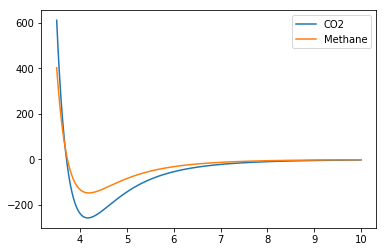

In [61]:
plt.plot( r, U_co, label = "CO2" )
plt.plot( r, U_me, label = "Methane")
plt.legend()

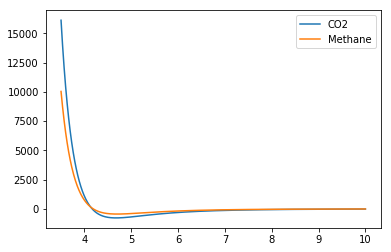

In [62]:
plt.plot( r, F_co, label = "CO2" )
plt.plot( r, F_me, label = "Methane")
plt.legend()

In [63]:
mix_data = sim_data[ (sim_data.yc0 > 0) & (sim_data.yc0 < 1) & (sim_data.Pf > 0)].copy()
mix_data.head()

,yc0,P0,ycf,Pf,rhoco,rhome
44,0.2,60.8,0.242605,69.866700,0.000444,0.001387
45,0.2,80.8,0.257017,95.204870,0.000675,0.001950
46,0.2,99.8,0.296752,132.182698,0.001204,0.002854
47,0.2,120.2,0.290302,159.702979,0.001402,0.003429
48,0.2,140.0,0.345737,219.957106,0.002358,0.004462


In [64]:
mix_data_high_v = sim_data_high_v[ (sim_data_high_v.yc0 > 0) & (sim_data_high_v.yc0 < 1) & (sim_data_high_v.Pf > 0)].copy()
mix_data_high_v.head()

,yc0,P0,ycf,Pf,rhoco,rhome
41,0.2,9.7,0.207987,9.678226,0.000047,0.000180
42,0.2,20.0,0.201016,20.922599,0.000099,0.000394
43,0.2,39.5,0.221721,43.180916,0.000235,0.000826
44,0.2,60.8,0.232390,69.185101,0.000422,0.001393
45,0.2,80.8,0.243459,99.218101,0.000657,0.002043


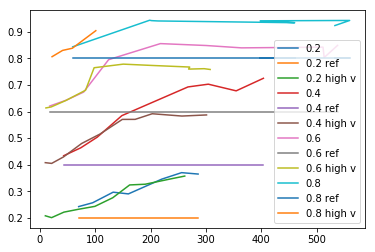

In [65]:
for yi in [0.2, 0.4, 0.6, 0.8]:
    select = mix_data[ mix_data.yc0 == yi]
    plt.plot( "Pf", "ycf", data = select, label = yi )
    plt.plot( "Pf", "yc0", data = select, label = str(yi) + " ref" )
    select_high_v = mix_data_high_v[ mix_data_high_v.yc0 == yi]
    plt.plot( "Pf", "ycf", data = select_high_v, label = str(yi) + " high v")
plt.legend()

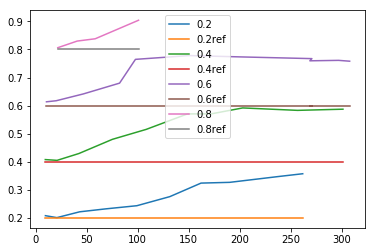

In [66]:
for yi in [0.2, 0.4, 0.6, 0.8]:
    select = mix_data_high_v[ mix_data_high_v.yc0 == yi]
    plt.plot( "Pf", "ycf", data = select, label = yi )
    plt.plot( "Pf", "yc0", data = select, label = str(yi) + "ref" )
plt.legend()

In [3]:
grid_data = pd.read_csv( 'mixture_grid.csv')
grid_data = grid_data.loc[ grid_data.Pf > 0 ]
grid_data.head()

,yc0,P0,ycf,Pf,rhoco,rhome
2,0.1,15,0.105600,14.857365,0.000038,0.000319
3,0.1,20,0.102893,17.861684,0.000050,0.000436
4,0.1,25,0.098958,26.053741,0.000061,0.000553
5,0.1,30,0.107771,31.570651,0.000081,0.000669
6,0.1,35,0.110243,37.639116,0.000100,0.000808


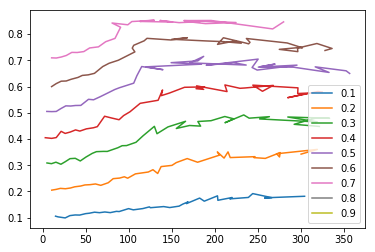

In [8]:
for yi in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    select = grid_data[ grid_data.yc0 == yi]
    plt.plot( "Pf", "ycf", data = select, label = yi )
plt.legend()

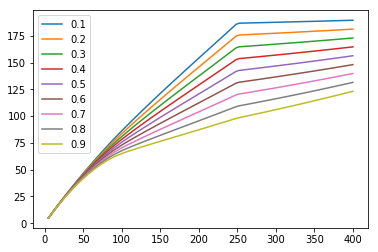

In [114]:
for yi in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    f = np.zeros( 100 )
    P = np.linspace( 5, 400, 100)
    for i in np.arange( 0, len(P) ):
        f[i] = fugacity( P[i], yi, co2_data, me_data)
    plt.plot( P, f, label = yi )
plt.legend()